<a href="https://colab.research.google.com/github/samadpls/TensorFlow-Model-Exploration/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Fashion Mnist Dataset Exploration and Neural Networks

**created by [samadpls](https://github.com/samadpls)**



In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist # loading dataset

(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23] # one pixel

194

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirts/top','Trouser','Pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle boot']

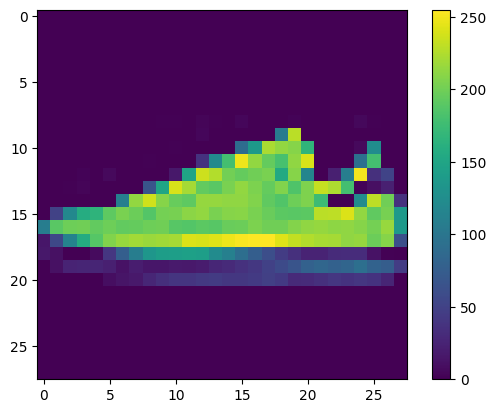

In [7]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.show()

In [8]:
#squeshing value between 0 to 1
train_images = train_images / 255.0

test_images = test_images / 255.0

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#input layer 1
    keras.layers.Dense(128,activation='relu'), #hideen layer , 128 is randomly selected as greater than 1 and smaller than 255
    keras.layers.Dense(10,activation='softmax') #output layer , bcz we have 10 classes_name, softmax make it 0 to 1
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5002 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3732 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3358 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3145 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2942 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2810 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2696 - accuracy: 0.8993
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2581 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2475 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2

In [12]:
test_loss, test_acc =  model.evaluate(test_images, test_labels, verbose=1) #verbose =how much we say when evalute
print("TEST ACCURACY ==>", test_acc) #overfitting in testing, we can fix this by either changing epochs or parameters like 128

313/313 [==============================] - 1s 2ms/step - loss: 0.3457 - accuracy: 0.8849
TEST ACCURACY ==> 0.8848999738693237


In [13]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Expected==> Ankle boot


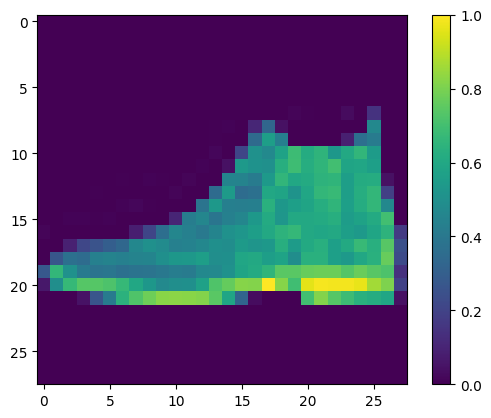

In [14]:
print("Expected==>",class_names[np.argmax(predictions[0])])
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.show()
